In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## 1. When will we hit 2C of global warming?

#### 1.1. Load data. Ensure it looks good.

In [2]:
hadcrut = pd.read_csv('hadcrut-5.0.1.0-annual.csv.bz2', sep=",")
print(hadcrut.shape)
print(hadcrut.sample(3))

(173, 4)
    Time  Anomaly (deg C)  Lower confidence limit (2.5%)  \
75  1925        -0.282425                      -0.414776   
9   1859        -0.281195                      -0.423850   
2   1852        -0.229399                      -0.409382   

    Upper confidence limit (97.5%)  
75                       -0.150075  
9                        -0.138541  
2                        -0.049416  


The data looks good, there is 173 roles and 4 variables, and the values of the columns also look good.

#### 1.2. Make a plot of the temperature anomaly for all years in the dataset. Describe what you see–how has the global temperature behaved through the last 170 years?

In [3]:
hadcrut = hadcrut.rename(columns={"Time": "time", "Anomaly (deg C)": "anomaly", "Lower confidence limit (2.5%)":"lcl", "Upper confidence limit (97.5%)":"ucl"})

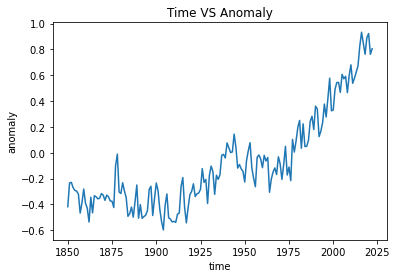

In [4]:
sns.lineplot(x="time", y="anomaly", data=hadcrut)
plt.title(label="Time VS Anomaly")
plt.show()

The Global Temperature Anomaly increased from usually in the negative Celcius degrees to now in the positive Celcius degrees.

#### 1.1. Compute the baseline anomaly (for 1850-1900).

In [5]:
base_anomaly = np.mean(hadcrut[hadcrut.time <= 1900].anomaly)
print(f"Base Anomaly: {base_anomaly}")

Base Anomaly: -0.3565021707254903


#### 1.2. Make a plot that shows the last 60 years of data, overlied with the regression line. In your opinion–does the regression line describe the trend well?

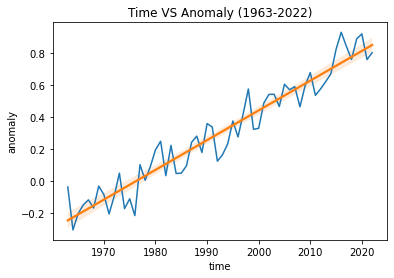

In [6]:
last_60 = hadcrut[(hadcrut.time >= 1963) & (hadcrut.time <= 2022)]
sns.lineplot(x="time", y="anomaly", data=last_60)
sns.regplot(x="time", y="anomaly", data=last_60, scatter=False)
plt.title(label = "Time VS Anomaly (1963-2022)")
plt.show()

I think the regression line describes the trend well.

#### 1.3. Keep in mind that we have a problem with this dataset: Anomaly is reported with reference to the 1961-1990 period. In order to normalize the data, create a new column that describes the temperature anomaly above the pre-industrial baseline (that is what you calculated in Q1.1 above).

In [7]:
hadcrut = hadcrut.copy()
hadcrut["anomaly_pre"] = hadcrut["anomaly"] - base_anomaly

#### 1.4. Estimate a linear regression model where you describe the anomaly above the pre-industrial baseline (this is what you calculated in Q1.3 above) as a function of years. How large is R2? What does this number tell you?

In [8]:
m = smf.ols('anomaly_pre ~ time', data = hadcrut[(hadcrut.time >= 1963) & (hadcrut.time <= 2022)]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            anomaly_pre   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     665.3
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.80e-33
Time:                        05:42:34   Log-Likelihood:                 55.935
No. Observations:                  60   AIC:                            -107.9
Df Residuals:                      58   BIC:                            -103.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.4592      1.439    -25.335      0.000     -39.340     -33.578
time           0.0186      0.001     25.794      0.000       0.017       0.020
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.385
Skew:                           0.061   Prob(JB):                        0.500
Kurtosis:                       2.266   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R Squard Value is 0.920 which tells us that 92% of the variance can be explained by the time variable, which means this fits the data pretty well.

#### 1.5. Interpret the coefficients. What does the slope mean? Is it statistically significant?

The slope means that a 1 increase in year will increase the difference bewteen the year and pre-industrial baseline by 0.0186 degrees Celcius while moving back a 1 decrease will result in a 0.0186 decrease. The intercept means at year 0 the pre-industrial baseline is -36.4592. The p value is 0 so it is significant.

#### 1.6.a. What does the intercept mean if you use years as is (1999, 2000, 2001, . . . )?

The intercept means the pre-industrial baseline at year 0

#### 1.6.b. What does the intercept mean if you use years relative to 2000 (-1, 0, 1, . . . )?

The intercept means the pre_industrial baseline at in 2000

#### Is it statistically significant?

It is significant, the p value is also 0.

#### 1.7. Use the intercept and slope, and compute how much above the pre-industrial baseline is the world now, in 2022.

In [9]:
anomaly_2022 = -36.4592 + 0.0186 * 2022
print(f"Difference Between Pre-Industrial Baseline 2022: {anomaly_2022} degrees Celcius")

Difference Between Pre-Industrial Baseline 2022: 1.1499999999999915 degrees Celcius


#### 1.8. Now use the slope and intercept to find which year will the trend hit 1.5C, and when will it hit 2C.

In [10]:
year_1 = (1.5 - (-36.4592))/0.0186
year_2 = (2 - (-36.4592))/0.0186
print(f"Year 1.5C: {year_1} Year 2C: {year_2}")

Year 1.5C: 2040.8172043010757 Year 2C: 2067.698924731183


#### 1.9. Now think about these two threshold years you computed. What do you think, might the thresholds be actually crossed earlier or later than what you computed, or maybe not at all? What does it depend on? Can you improve your model to make your predictions better?

I think the threshold might cross earlier than we expect due to other issues such as destruction to the ecosystem. It depends on other factors to account for the other 8% of the variance. I can improve my model by adding more variables to the regression, such as waste generated each year.

## 2. How Is Basketball Game Score Calculated?

#### 2.1. Load data (harden-21-22.csv). Do basic checks.

In [11]:
harden = pd.read_csv('harden-21-22.csv.bz2', sep=",")
print(harden.shape)
print(harden.sample(3))

(83, 30)
    Rk     G        Date     Age   Tm Unnamed: 5  Opp Unnamed: 7        GS  \
21  22  22.0  2021-12-03  32-099  BRK        NaN  MIN     W (+5)         1   
56  57   NaN  2022-02-12  32-170  PHI        NaN  CLE    W (+10)  Inactive   
39  40  35.0  2022-01-12  32-139  BRK          @  CHI    W (+26)         1   

          MP  ...       DRB       TRB       AST       STL       BLK       TOV  \
21     35:43  ...         7         7         9         2         0         6   
56  Inactive  ...  Inactive  Inactive  Inactive  Inactive  Inactive  Inactive   
39     33:16  ...         6         7        16         1         1         2   

          PF       PTS      GmSc       +/-  
21         4        20      15.5       +10  
56  Inactive  Inactive  Inactive  Inactive  
39         0        25      31.7       +24  

[3 rows x 30 columns]


The data had 83 rows and 30 variables, and the columns look fine.

#### 2.2. These data also include games where he did not play. Find how many games did James Harden actually play in this season.

In [12]:
print(f"Harden played {harden[harden.G > 0].shape[0]} games in the 2021-2022 season")

Harden played 65 games in the 2021-2022 season


#### 2.3. Clean the data and ensure the relevant variables are of numeric type so we can use those in the regression models. It is your task to find what is wrong with the data in its present form (it is downloaded directly from basketball-reference.com), and fix these issues.

In [13]:
col = ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc']
for c in col:
    harden[c] = pd.to_numeric(harden[c], errors='coerce')

#### 2.4. Analyze the game score GmSc. What is its range? Mean? Standard deviation? Which distribution does the histogram resemble?

Range: (1.1, 37.8)
Mean: 19.61384615384615
Standard Deviation: 8.168944511861358


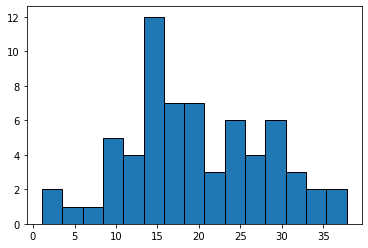

In [14]:
min = np.min(harden.GmSc)
max = np.max(harden.GmSc)
mean = np.mean(harden.GmSc)
std = np.std(harden.GmSc)
print(f'''Range: {(min, max)}
Mean: {mean}
Standard Deviation: {std}''')
plt.hist(x=harden.GmSc, bins = 15, edgecolor="k")
plt.show()

It looks normal, but slightly right skewed.

#### 2.5. First, let’s run a simple regression model explaining game score GmSc by field goal attempts FGA:

In [15]:
m = smf.ols('GmSc ~ FGA', data = harden).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     9.678
Date:                Mon, 08 May 2023   Prob (F-statistic):            0.00280
Time:                        05:42:34   Log-Likelihood:                -224.11
No. Observations:                  65   AIC:                             452.2
Df Residuals:                      63   BIC:                             456.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8748      3.582      2.477      0.016       1.716      16.034
FGA            0.7037      0.226      3.111      0.003       0.252       1.156
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.198
Skew:                          -0.127   Prob(JB):                        0.906
Kurtosis:                       2.905   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2.5.a. What is the interpretation of Intercept (β0)?

The intercept is 8.8748, which means when Harden doesn't attempt a single field goal, he has a Game Score of 8.8748.

#### 2.5.b. What is the interpretation of FGA (β1)? Is it statistically significant?

The slope is 0.7037 which means as FGA increases by 1, Harden's game score increases by 0.7037. With a p value of 0.003 the slope is statistically significant.

#### 2.6. Next, let’s analyse how is game score related to field goals (FG) and field goal attempts (FGA). Estimate the model.

In [16]:
m = smf.ols('GmSc ~ FG + FGA', data = harden).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     45.30
Date:                Mon, 08 May 2023   Prob (F-statistic):           7.49e-13
Time:                        05:42:34   Log-Likelihood:                -199.48
No. Observations:                  65   AIC:                             405.0
Df Residuals:                      62   BIC:                             411.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9917      2.472      3.637      0.001       4.049      13.934
FG             3.0427      0.363      8.383      0.000       2.317       3.768
FGA           -0.5523      0.216     -2.553      0.013      -0.985      -0.120
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.069
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       3.151   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2.6.a. What is the interpretation of FG? Is it statistically significant?

The FG slope means that at for every 1 increase in FG, there is a 3.0427 increase in Harden's game score. It is statistically significant with a p value of 0

#### 2.6.b. What is the interpretation of FGA (β2)? Is it statistically significant?

The FGA slope means that for every 1 increase in FGA, there is a decrease of 0.5523 in Harden's game score. It is statistically significant, with a p value of 0.013.

#### 2.6.c. How do you explain the fact that model 1 shows positive and model 2 shows a negative estimate for FGA? There is a very easy an intuitive explanation that everyone will understand, including those who have no clue about stats. Can you phrase it in that way?

The FGA variable has less effect Harden's game score when calculated with the FG variable, which means FGA variable is less significant than the FG variable.

#### 2.6.d. What is the R2 of the model? How does it compare to the model 1? What do you conclude from this comparison?

The R2 of this model is 0.594 which is greater than the R2 of model 1, 0.133, which means that this model is better at explaining the variance in the data more than model 1.

#### 2.7. Now include all the independent numerical variables, i.e. FG, FGA, 3P, 3PA, FT, FTA, ORB, DRB, AST, STL, BLK, TOV, PF into the model. Estimate it, and discuss the results.

In [17]:
m = smf.ols('GmSc ~ FG + FGA + Q("3P") + Q("3PA") + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF', data = harden).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.998e+30
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        05:42:34   Log-Likelihood:                 2007.5
No. Observations:                  65   AIC:                            -3987.
Df Residuals:                      51   BIC:                            -3957.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.02e-14    9.3e-15      3.249      0.002    1.15e-14    4.89e-14
FG             2.4000   9.09e-16   2.64e+15      0.000       2.400       2.400
FGA           -0.7000   6.01e-16  -1.17e+15      0.000      -0.700      -0.700
Q("3P")        1.0000   1.56e-15   6.42e+14      0.000       1.000       1.000
Q("3PA")   -1.193e-15   1.02e-15     -1.167      0.249   -3.25e-15    8.59e-16
FT             1.4000   1.73e-15   8.07e+14      0.000       1.400       1.400
FTA           -0.4000   1.43e-15  -2.79e+14      0.000      -0.400      -0.400
ORB            0.7000   1.31e-15   5.36e+14      0.000       0.700       0.700
DRB            0.3000   6.16e-16   4.87e+14      0.000       0.300       0.300
AST            0.7000   4.96e-16   1.41e+15      0.000       0.700       0.700
STL            1.0000   1.41e-15   7.08e+14      0.000       1.000       1.000
BLK            0.7000   1.99e-15   3.51e+14      0.000       0.700       0.700
TOV           -1.0000   8.34e-16   -1.2e+15      0.000      -1.000      -1.000
PF            -0.4000    1.1e-15  -3.65e+14      0.000      -0.400      -0.400
==============================================================================
Omnibus:                        1.045   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                1.075
Skew:                          -0.196   Prob(JB):                        0.584
Kurtosis:                       2.507   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2.7.a. How do standard errors and t-values look like in this model?

Standard deviations are all really small, while absolute values of t-values are mostly very big.

#### 2.7.b. What is R2 of this model? What does it tell you about how game score is calculated?

The R2 value is 1.000, whihc means it perfectly models the game score. Which means game score are calculated using these variables.

#### 2.7.c. What do the results tell about turnover (TOV )? Is it good or bad for the team?

Turnovers are not good for their team, as 1 increase in turnover causes the game score to decrease by 1.

#### 2.8. Finally, consult the game score explanation at https://www.nbastuffer.com/analytics101/ game-score/. Did you recover the same formula?

All but the FG coefficients are the same, this is because the Game Score Formula on the website includes points as part of the variables. I didn't recover the same, but a similar one.

## 3. Interpret regression results in the literature

#### 3.1. Do those who have a partner have better mental health (as measured by PHQ-9)? Is the effect statistically significant?

Based on the table, those who has a partner have a better mental health, since in lowers the PHQ-9 by 0.47 and lower PHQ-9 means better mental health. However, this variable is not statistically significant due to its p value being 0.15, which is greater than 0.05.

#### 3.2. What is the effect of COVID exposure? Is it improving or worsening mental health? Is the effect statistically significant

Covid 19 exposure has a negative influence on mental health as it increases PHQ-9 by 0.24, however it is not statistically significant with a p value of 0.129.

#### 3.3. How is Financial distress related to mental health? Is the effect statistically significant?

Financial distress has a negative influence on mental health as it increases PHQ-9 by 2.32, and it is also statistically significant with a p value less than 0.001.

I spent around 2.5hr on this